In [11]:
import cv2

In [13]:
import matplotlib.pyplot as plt

In [15]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [17]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)


In [19]:
classLabels=[]
file_name='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [21]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [23]:
print(len(classLabels))

80


In [25]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001C23BF0BE10>

In [27]:
#read a sample image

In [43]:
img=cv2.imread('bmw-m4.jpg')

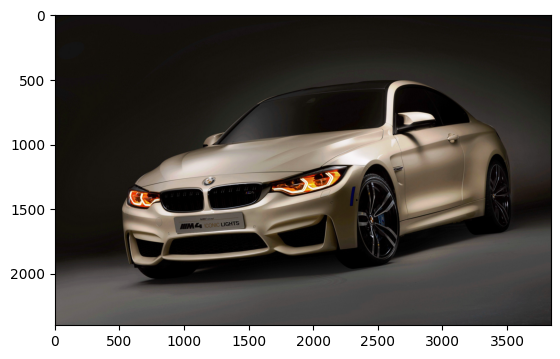

In [45]:
plt.imshow(img) #bgr

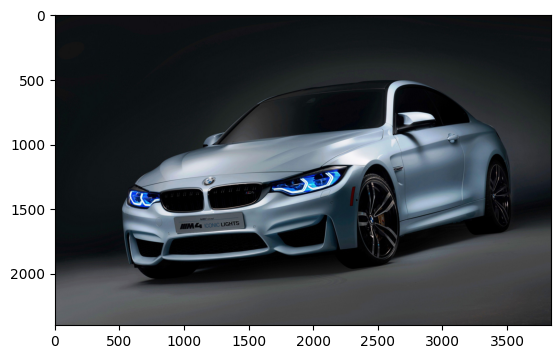

In [47]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [49]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [51]:
print(ClassIndex) 

[3]


In [53]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #rectangle around objects
    cv2.rectangle(img, (boxes[0], boxes[1]), (boxes[2], boxes[3]), (255, 0, 0), 2)
    
    cv2.putText(
        img, 
        classLabels[ClassInd - 1], 
        (boxes[0] + 10, boxes[1] + 40), 
        font, 
        font_scale, 
        (0, 255, 0), 
        thickness=3
    )


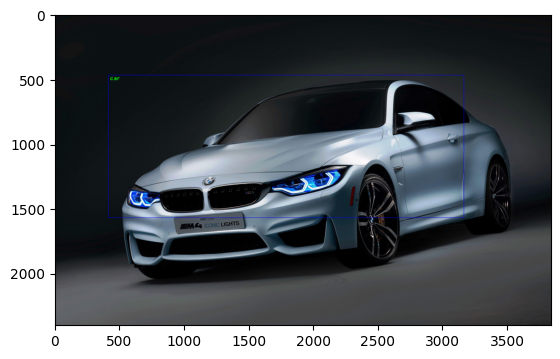

In [57]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [65]:
#video testing

In [ ]:
cap = cv2.VideoCapture("1721294-hd_1920_1080_25fps.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, font_scale, color=(0, 255, 0))

    cv2.imshow('Object DETECTION', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
